In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import backend as K

In [3]:
data = pd.read_csv('KIS_KIS.csv')
print('총 스팸 샘플의 수 :', len(data))

총 스팸 샘플의 수 : 122768


In [4]:
# SNS 대화 내역 파일
import json

with open("sample.json", 'r') as j:
  contents = json.loads(j.read()) # Json Read

print(len(contents['data']))
print(len(contents['data'][0]['body']['dialogue']))

P01 = '' # 화자 1번이 대화한 내역
P02 = '' # 화자 2번이 대화한 내역
ham_list = [] # 모든 대화 내역 list
for j in range(len(contents['data'])):
  for i in range(len(contents['data'][j]['body']['dialogue'])):
    if contents['data'][j]['body']['dialogue'][i]['participantID'] == 'P01':
      P01 += contents['data'][j]['body']['dialogue'][i]['utterance']
      P01 += ' '
    else:
      P02 += contents['data'][j]['body']['dialogue'][i]['utterance']
      P02 += ' '
  ham_list.append(P01)
  ham_list.append(P02)
  P01 = ''
  P02 = ''

print(ham_list)

3140
24
['너~~무 앞인데 아아아아 ㅇㅇ갑자기 이해 팍 된다 확 와닿앗음 ㅠㅠㅠㅠㅠ 겉돈단 느낌 지금도 들려나 이제 대놓고 괴롭히는 좋아ㅋㅋ이없는뎅 운다 울어운다 울어근데 소외감 느꼇을만하네 #@기타# 멘탈 나갓을때니까 아무도안들어주는거같거 나도 ncs하다가 내얘기하느랔웃기다ㅋ#@기타#웃기다ㅋㅋㅋ 십어버림 ', 'ㅋㄲㅋㅋ #@이름#가 겉돈단 생각 없지않아 조금하고있어서 조금 예민할수도 너랑나처럼 #@기타#편하고 막 잘놀고그런건아니자너 그와중에 놀아달라할때 씹으믄 약간의 소외감느낄껄ㅋㅋ 근데오긴올듯 근데 헤어졌는데 너무 무시해섴ㅋ맘상했것다.. 그러게 하씨 친구랑놀다 얼핏본거여서 별거아니겠지해쏜디 ', '엄마 대단하지 않냐 아빠랑 30년동안 같이 자고 웅 ㅋㅋㅋ코 골지 잠꼬대 하지 으,,난 못해 사랑의 힘인가 그렇다 쳐도 대단쓰 ', '코 고는거 떔시? 엄마는 잠들면 안 들린대 대단혀 진짜 아니면 아예 익숙해져서 걍 무뎌진 거 아닐까 ', '#@이모티콘# 그러고보니까 이제 퇴근 30분남앗네! ㅋㅋㅋ귀여워?? 내친구가 정신없다고 쓰지마라던데 ㅋㅋㅋㅋㅋ 그래??ㅋㅋ #@이름#가 귀엽다면 된거지 머 ', '이모티콘 그거 진짜 너무 귀여운 거 아니가 이거... 완전 귀여븐데 어엉 그걸 또 잘 써서 윽시 귀엽넴ㅋㅋㅋㅋ ', '진짜 강아지 키우고싶다.. 독립생각없어? ㅜㅜㅜㅜ돈이 문제여,,,, 근데 강아지 많이많이 생각해보셔.... 내가 잠깐 데리고 있던적이 있는데 증말 상상이상이야 너무너무 이뻐죽겠고 그래서 진짜 너무 행복한데 보통은 조금 애기때 데리고 오자나 2개월이후?에 엄마강아지 젖떼고 나서 데리고오는게 가장 좋대 ', '웅웅 ㅠㅠ 아직은... 왜냐면 돈이 넘 마니들거가타... 나 진지하게 강아지 키우고싶어ㅠㅠ ㅠㅠ근데 완전 반대해,,,, 우웅 웅웅 ', '지금은 애들이 일찍자니까 전에 수업끝나고 애들보고간다고 요즘은 자기수업가기전에 애들보고싶다고 데리고 오라함 집으로 ', '고모는 왜그러세요 집도 가까운디 왜 야밤에 ㅋㅋ 세상에 ', '#@시스템#동영상# 으

In [5]:
ham = pd.DataFrame({'Text':ham_list}) # DataFrame 화
ham.insert(0, 'Spam', 'ham') # Spam 구분값 추가
ham['Spam'] = ham['Spam'].replace(['ham'],[0]) # Ham 을 숫자 0 으로 교체
ham

,Spam,Text
0,0,너~~무 앞인데 아아아아 ㅇㅇ갑자기 이해 팍 된다 확 와닿앗음 ㅠㅠㅠㅠㅠ 겉돈단 느...
1,0,ㅋㄲㅋㅋ #@이름#가 겉돈단 생각 없지않아 조금하고있어서 조금 예민할수도 너랑나처럼...
2,0,"엄마 대단하지 않냐 아빠랑 30년동안 같이 자고 웅 ㅋㅋㅋ코 골지 잠꼬대 하지 으,..."
3,0,코 고는거 떔시? 엄마는 잠들면 안 들린대 대단혀 진짜 아니면 아예 익숙해져서 걍 ...
4,0,#@이모티콘# 그러고보니까 이제 퇴근 30분남앗네! ㅋㅋㅋ귀여워?? 내친구가 정신없...
...,...,...
6275,0,1시까지보자 어디서봐야하지 음 갤러리아에서보면되겠다
6276,0,뚜섬으로 와 그거 6월말까지더라 우선 뚜썸 와잇어 도서관가고픔 말하공 그려
6277,0,점심도 못 먹고 개배고픈데ㅋㅋㅋㅋ 엉 맞음 안 그래도 그거 써야함 아냐 투썸 갈게 ...
6278,0,ㅋㅋㅋㅋㅋ님 그럼 언제오는걸로 확정인뎅 ㅇㅇㅇ당근 괜찮지 담주 이번주? 아니제 담주제?


In [6]:
# Spam data check
data[:5]

,2020,01,01.1,090100,***********,***********.1,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 박양주 올림
0,2020,1,1,90100,***********,***********,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...
1,2020,1,1,90200,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
2,2020,1,1,90200,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
3,2020,1,1,94500,***********,***********,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...
4,2020,1,1,94600,***********,***********,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...


In [7]:
del data['2020']
del data['01']
del data['01.1']
del data['090100']
del data['***********']
del data['***********.1'] # Text 제외 모든 값 제거
data.columns = ['Text'] # Text 의 Title 추가
data.insert(0, 'Spam', 'spam') # Spam 구분값 추가
data['Spam'] = data['Spam'].replace(['spam'],[1]) # Spam 을 숫자 1 로 교체

# Text 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)
print('총 샘플의 수 :', len(data))

data = data.sample(n=6280) # Ham Text 와 같게 갯수 조정
data[:5]

총 샘플의 수 : 12554


,Spam,Text
57785,1,긴급 15일최대주주 경영권 매각 추진 답변공시!바로 내일.큽니다선점할 분아래로 들어...
1726,1,[Web발신](광고)빅데이터로 재테크를?노후관리 빅데이터로!!hxxp://lop.b...
70299,1,정혜성웰바이오텍모비스남들쉴때 다 쉬면언제 돈 버시나요과거는잊고미래를 준비하세요
1614,1,(광고)(KB국민)10일고객님은연2.3%~9천만원까지10년간사용가능무료거부 *
50514,1,[Web발신](광고)송추 경남아너스빌25평.비규제.6개월후전매.계약금천만원~선착순무...


In [8]:
texts = pd.concat([data, ham]) # 2개의 DataFrame 합치기
texts = texts.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
texts

,Spam,Text
0,1,[Web발신](광고)(O피시티)상호명변주소안내기존22점컴안내!22이후는사칭입니다무료...
1,1,(광고)달콤했던 주말이 벌써 지나갔습니다. 또 다시 월요병이 돋아나기 시작했는데 어...
2,1,(광고)안녕하세요 KB금융 서민대출 소식 안내 도움드립니다.앞서 과다기대출 및 연체...
3,1,(광고)『고객님께서는 [KB국민] 특별지원대출상품 대상자입니다.』힘들고 어려운 상황...
4,0,나 ih 나왔어.. 와#@기타# 두번봐야되는줄 일등급 안할거야ㅠㅠㅠ 야진짜...천운...
...,...,...
12555,0,디자인팀 물어보는거아닐까여 음?그건 아닐꺼같은데 그냥 그거아냐? 마케팅? 그러면 저...
12556,1,(광고)당월 20000000원일일 한시간 소요hxxp://pwem10.kr/무료거부*
12557,1,새마을에서 서민.금융소외계층을 위한 정부지원 상품으로 진행도움드립니다.최대 : [1...
12558,0,태블릿으로 해도되나 노트북이 더느릴걸 언니안해본거


In [9]:
texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12560 entries, 0 to 12559
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Spam    12560 non-null  int64 
 1   Text    12560 non-null  object
dtypes: int64(1), object(1)
memory usage: 196.4+ KB


In [10]:
print('결측값 여부 :', texts.isnull().values.any()) # Null 값이 있는지 check

결측값 여부 : False


In [11]:
print('Text 열의 유니크한 값 :', texts['Text'].nunique()) # 다른 Text 와 안 겹치는 갯수

Text 열의 유니크한 값 : 12560


In [12]:
# Text 열에서 중복인 내용이 있다면 중복 제거
texts.drop_duplicates(subset=['Text'], inplace=True)
print('총 샘플의 수 :', len(texts))

총 샘플의 수 : 12560


In [13]:
texts[:5]

,Spam,Text
0,1,[Web발신](광고)(O피시티)상호명변주소안내기존22점컴안내!22이후는사칭입니다무료...
1,1,(광고)달콤했던 주말이 벌써 지나갔습니다. 또 다시 월요병이 돋아나기 시작했는데 어...
2,1,(광고)안녕하세요 KB금융 서민대출 소식 안내 도움드립니다.앞서 과다기대출 및 연체...
3,1,(광고)『고객님께서는 [KB국민] 특별지원대출상품 대상자입니다.』힘들고 어려운 상황...
4,0,나 ih 나왔어.. 와#@기타# 두번봐야되는줄 일등급 안할거야ㅠㅠㅠ 야진짜...천운...


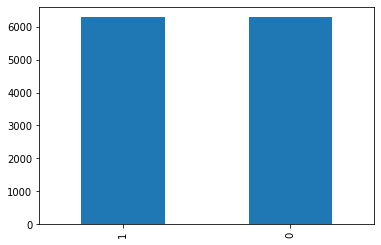

In [14]:
texts['Spam'].value_counts().plot(kind='bar') # Spam 비율

In [15]:
print('정상 메일과 스팸 메일의 개수')
print(texts.groupby('Spam').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   Spam  count
0     0   6280
1     1   6280


In [16]:
print(f'정상 메일의 비율 = {round(texts["Spam"].value_counts()[0]/len(texts) * 100, 3)}%') # Spam 비율
print(f'스팸 메일의 비율 = {round(texts["Spam"].value_counts()[1]/len(texts) * 100, 3)}%')

정상 메일의 비율 = 50.0%
스팸 메일의 비율 = 50.0%


In [17]:
X_data = texts['Text'] # Text 저장
y_data = texts['Spam'] # Label 저장
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 12560
레이블의 개수: 12560


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data) # 데이터를 Train , Test 용으로 분리.

In [19]:
print('-------훈련 데이터의 비율-------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100, 3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100, 3)}%')

-------훈련 데이터의 비율-------
정상 메일 = 50.0%
스팸 메일 = 50.0%


In [20]:
print('-------테스트 데이터의 비율-------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100, 3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100, 3)}%')

-------테스트 데이터의 비율-------
정상 메일 = 50.0%
스팸 메일 = 50.0%


In [21]:
# 단어 분리기 모듈 설치
!pip install soynlp

from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 8.0 MB/s 


In [22]:
word_extractor = WordExtractor()
word_extractor.train(X_train) # Train 그룹의 Text 를 단어로 분리하기 위한 훈련
word_score_table = word_extractor.extract()

training was done. used memory 0.782 Gb
all cohesion probabilities was computed. # words = 20264
all branching entropies was computed # words = 39343
all accessor variety was computed # words = 39343


In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[1, 8464, 14852, 14853, 14854, 14855, 513, 14856], [2, 2349, 8465, 8466], [11, 14857, 577, 7, 8467, 84, 1492, 8468, 9, 14, 14858, 80, 4, 9, 820, 1084, 549, 28, 14, 323, 459, 11, 8469, 1218, 14859, 79, 4736, 64, 3354, 1493], [1, 14860, 4737, 14861, 14862, 14863, 1970], [14864, 777, 14865, 14866, 438, 14867, 8470, 138, 2602, 88, 14868, 14869, 14870, 14871, 550, 14872, 14873, 14874, 2138, 14875, 14876, 14877, 43, 14878, 14879, 14880, 53, 14881, 14882, 1010, 14883]]


In [24]:
word_to_index = tokenizer.word_index # 숫자로 index 화
print(word_to_index)

{'광고': 1, 'web발신': 2, '및': 3, '이름': 4, '바랍니다': 5, '2': 6, '나': 7, '있습니다': 8, '아': 9, '1': 10, '근데': 11, '가능': 12, '상품': 13, '진짜': 14, '아래': 15, '등': 16, '무료거부': 17, '사진': 18, '본': 19, '시스템': 20, '한도': 21, '00': 22, '최대': 23, '더': 24, '2020년': 25, '3': 26, '5': 27, 'ㅋㅋㅋ': 28, '또는': 29, '안녕하세요': 30, '전화': 31, '안내드립니다': 32, '수': 33, '난': 34, '8': 35, '오늘': 36, '지금': 37, '무조건': 38, '후': 39, '9': 40, '거절': 41, '항상': 42, '내가': 43, '따라': 44, '금리': 45, '번호로': 46, '7': 47, '너무': 48, '수수료': 49, '나도': 50, '함께': 51, '다': 52, '응': 53, '그냥': 54, 'ㅋㅋ': 55, '1번': 56, '상품내용': 57, '18': 58, '왜': 59, '신청': 60, 'kr': 61, '접수자가': 62, '하셔서': 63, 'ㅎㅎ': 64, 'ly': 65, '확인': 66, '진행': 67, '6': 68, '아니': 69, '많으니': 70, '이상': 71, '기타': 72, '그럼': 73, '그': 74, 'ㅠㅠ': 75, '이모티콘': 76, '금전': 77, '누르시면': 78, '잘': 79, '웅': 80, '발생하는': 81, '기존': 82, 'ㅋㅋㅋㅋ': 83, '한': 84, 'ㅠ': 85, '고객님의': 86, '좀': 87, '많이': 88, '있는': 89, '이': 90, '이제': 91, '대출': 92, '직접': 93, '내': 94, '문자수신번호로': 95, '나는': 96, '무료수신거부': 97, '내용을': 98, '최근': 

In [25]:
threshold = 2
total_cnt = len(word_to_index) #  단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold 보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold 보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합(vocabulary)에서 희귀 단어의 비율:', (rare_cnt / total_cnt) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq / total_freq) * 100)

등장 빈도가 1번 이하인 희귀 단어의 수: 47279
단어 집합(vocabulary)에서 희귀 단어의 비율: 76.09689361017222
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 24.50793881179599


In [26]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size))) # 정리한 후의 단어 종류 갯수

단어 집합의 크기: 62131


메일의 최대 길이 : 260
메일의 평균 길이 : 19.199144


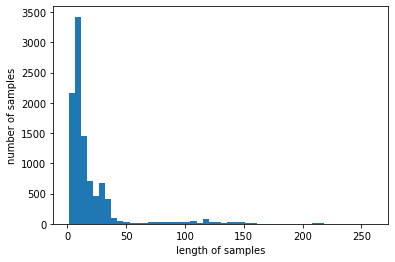

In [73]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_train_encoded], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
max_len = (int)(sum(map(len, X_train_encoded))/len(X_train_encoded)) + 1 # Text의 최대 길이
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print('훈련 데이터의 크기 (shape):', X_train_padded.shape)

훈련 데이터의 크기 (shape): (10048, 20)


In [30]:
# recall, precision, f1score 을 구하는 함수 https://m.blog.naver.com/wideeyed/221226716255
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [59]:
# 훈련 model 생성 및 훈련
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

embedding_dim = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', precision, recall, f1score]) # 위에 설정한 함수를 '' 없이 직접 적음.
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
126/126 [==============================] - 20s 112ms/step - loss: 0.2889 - acc: 0.8831 - precision: 0.8887 - recall: 0.8929 - f1score: 0.8791 - val_loss: 0.1180 - val_acc: 0.9552 - val_precision: 0.9259 - val_recall: 0.9893 - val_f1score: 0.9561
Epoch 2/5
126/126 [==============================] - 13s 101ms/step - loss: 0.0482 - acc: 0.9893 - precision: 0.9878 - recall: 0.9913 - f1score: 0.9892 - val_loss: 0.1121 - val_acc: 0.9592 - val_precision: 0.9337 - val_recall: 0.9897 - val_f1score: 0.9603
Epoch 3/5
126/126 [==============================] - 13s 101ms/step - loss: 0.0145 - acc: 0.9980 - precision: 0.9979 - recall: 0.9982 - f1score: 0.9980 - val_loss: 0.0970 - val_acc: 0.9667 - val_precision: 0.9483 - val_recall: 0.9870 - val_f1score: 0.9669
Epoch 4/5
126/126 [==============================] - 13s 102ms/step - loss: 0.0074 - acc: 0.9988 - precision: 0.9986 - recall: 0.9990 - f1score: 0.9988 - val_loss: 0.0772 - val_acc: 0.9741 - val_precision: 0.9748 - val_recall: 0.973

In [60]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 128)         7952768   
                                                                 
 lstm_17 (LSTM)              (None, None, 128)         131584    
                                                                 
 lstm_18 (LSTM)              (None, None, 32)          20608     
                                                                 
 lstm_19 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,106,281
Trainable params: 8,106,281
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Test 데이터로 확인
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
data = model.evaluate(X_test_padded, y_test)
print("\n 테스트 정확도: %.4f" % (data[1]))
print(" 테스트 정밀도: %.4f" % (data[2]))
print(" 테스트 재현율: %.4f" % (data[3]))
print(" 테스트 F1 Score: %.4f" % (data[4]))

79/79 [==============================] - 2s 24ms/step - loss: 0.1106 - acc: 0.9697 - precision: 0.9523 - recall: 0.9885 - f1score: 0.9689

 테스트 정확도: 0.9697
 테스트 정밀도: 0.9523
 테스트 재현율: 0.9885
 테스트 F1 Score: 0.9689


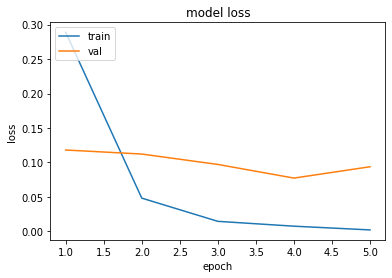

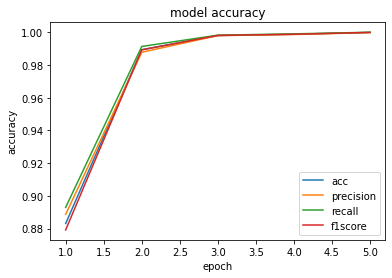

In [69]:
# 그래프로 설명
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.title('model accuracy')
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['precision'])
plt.plot(epochs, history.history['recall'])
plt.plot(epochs, history.history['f1score'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'precision', 'recall', 'f1score'], loc='lower right')
plt.show()